In [80]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Step 1 - Define Buisness Goal

* Build a model than predict **"survived"**, **"not survived"** for the passengers of titanic given its *Passenger Class, Sex, Age, Siblings/Spouse number, Parent/Children number, Fare, Location of Embarking* (Min Accuracy: 0.78)

## Step 2 - Get the data

In [1078]:
data_train = pd.read_csv('data/train.csv')

## Step 3 - Train-Test-Split

In [1079]:
from sklearn.model_selection import train_test_split
#X = data.drop('Survived', axis=1)
#y = data['Survived']
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# Not necessary, train.csv is already the training dataset

#data_train = X_train.merge(y, left_index=True, right_index=True)

## Step 4 - Explore the Data

In [1080]:
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [1081]:
data_train.shape

(891, 12)

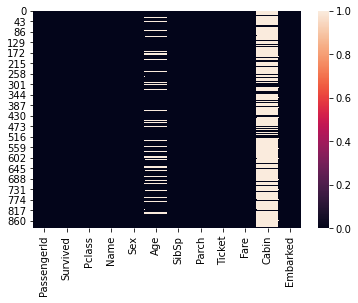

In [1082]:
sns.heatmap(data_train.isna(), vmin=0, vmax=1)

In [1083]:
# Check for NaN 
data_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

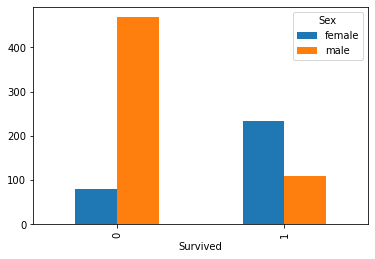

In [1084]:
data_train.groupby(['Survived', 'Sex']).size().unstack(1).plot.bar()

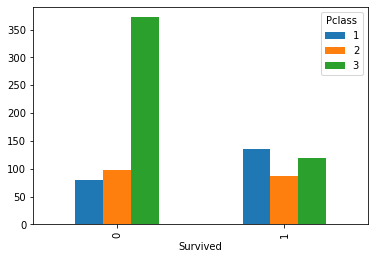

In [1085]:
data_train.groupby(['Survived', 'Pclass']).size().unstack(1).plot.bar()

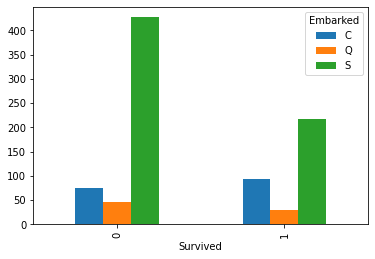

In [1086]:
data_train.groupby(['Survived', 'Embarked']).size().unstack(1).plot.bar()

In [1087]:
data_train.groupby('Survived')['Age', 'Fare'].agg([np.mean, np.std])

<ipython-input-1087-2778ef09c60b>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data_train.groupby('Survived')['Age', 'Fare'].agg([np.mean, np.std])


Age                  Fare           
               mean        std       mean        std
Survived                                            
0         30.626179  14.172110  22.117887  31.388207
1         28.343690  14.950952  48.395408  66.596998

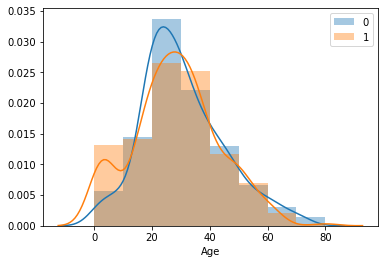

In [1088]:
bins=[0,10,20,30,40,50,60,70,80]

for outcome in data_train['Survived'].unique():
    mask = data_train['Survived'] == outcome
    sns.distplot(data_train[mask]['Age'], kde=True, label=outcome, bins=bins)
    
plt.legend()

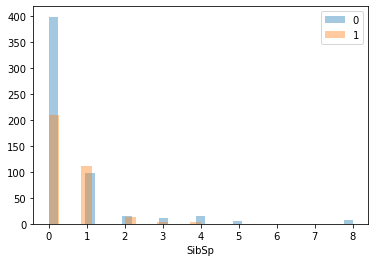

In [1089]:
for outcome in data_train['Survived'].unique():
    mask = data_train['Survived'] == outcome
    sns.distplot(data_train[mask]['SibSp'], kde=False, label=outcome,)
    
plt.legend()

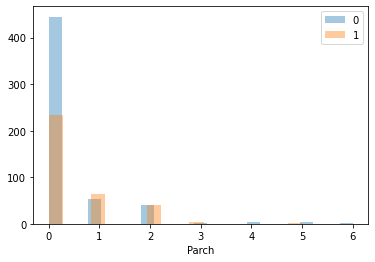

In [1090]:
for outcome in data_train['Survived'].unique():
    mask = data_train['Survived'] == outcome
    sns.distplot(data_train[mask]['Parch'], kde=False, label=outcome,)
    
plt.legend()

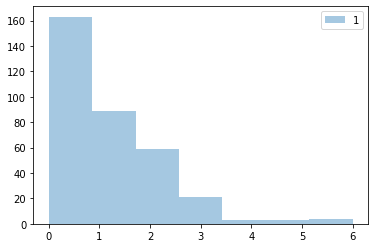

In [1091]:
mask = data_train['Survived'] == 1
sns.distplot((data_train[mask]['Parch']+data_train[mask]['SibSp']), kde=False, label=1, bins=7)
plt.legend()

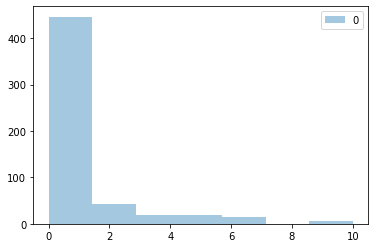

In [1092]:
mask = data_train['Survived'] == 0
sns.distplot((data_train[mask]['Parch']+data_train[mask]['SibSp']), kde=False, label=0, bins=7)
plt.legend()

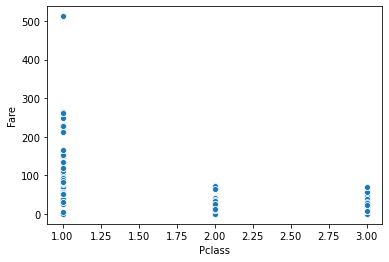

In [1093]:
sns.scatterplot('Pclass', 'Fare', data=data_train)

# Train Model(s)

In [1094]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_confusion_matrix, precision_score, recall_score, accuracy_score, f1_score
from sklearn.model_selection import cross_val_score

In [1095]:
# Function for giving all evaluation stats back
def classfier_eval(y_true, y_pred):
    
    print(f' Accuracy (TP+TN/TP+TN+FN+FP): {round(accuracy_score(y_true, y_pred),2)}') 
    print(f' Precision (TP/TP+FP): {round(precision_score(y_true, y_pred),2)}')
    print(f' Recall (TP/TP+FN): {round(recall_score(y_true, y_pred),2)}')    
    print(f' F1-score (Precision*Recall/Precision+Recall): {round(f1_score(y_true, y_pred),2)}')   

In [1096]:
def train_model(X_train, y_train, model):
    # Create model
    m = model
    # Fitting the model
    m.fit(X_train, y_train)
    # Fitting parameters
    #print(f'w0 = {round(m.intercept_[0], 2)}')
    #for i in range(len(m.coef_[0])):
    #    print(f'w{i+1} = {round(m.coef_[0][i], 2)}')
    #print()
    
    # Gives states of training model performance back
    print(classfier_eval(y_train, m.predict(X_train)))
    
    # Confusion matrix of the model PClass vs Survival
    plot_confusion_matrix(estimator=m,
                     X=X_train,
                     y_true=y_train)
    
    
    # returns model
    return m

## Step 5 - Benchmark Model

### Logistic regression on pClass only

In [1097]:
# Define X and y of Model 
X = data_train[['Pclass']]
y = data_train['Survived']

 Accuracy (TP+TN/TP+TN+FN+FP): 0.68
 Precision (TP/TP+FP): 0.63
 Recall (TP/TP+FN): 0.4
 F1-score (Precision*Recall/Precision+Recall): 0.49
None


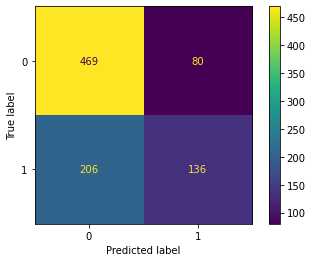

In [1098]:
m_benchmark = train_model(X, y, LogisticRegression(random_state=20))

In [1099]:
cross_val_accuracy = cross_val_score(estimator=m_benchmark
                   , X=X
                   , y=y
                   , cv=5
                   , scoring='accuracy')

In [1100]:
cross_val_accuracy.mean()

0.6790973573535873

### Decision Tree

 Accuracy (TP+TN/TP+TN+FN+FP): 0.68
 Precision (TP/TP+FP): 0.63
 Recall (TP/TP+FN): 0.4
 F1-score (Precision*Recall/Precision+Recall): 0.49
None


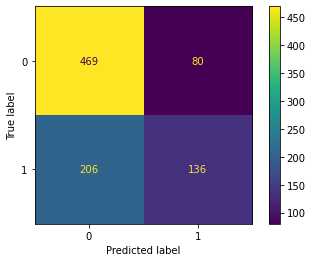

In [1101]:
m_tree_bench = train_model(X, y, DecisionTreeClassifier(max_depth=2))

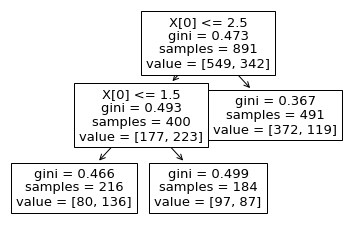

In [1347]:
plot_tree(m_tree)
None

 Accuracy (TP+TN/TP+TN+FN+FP): 0.79
 Precision (TP/TP+FP): 0.79
 Recall (TP/TP+FN): 0.62
 F1-score (Precision*Recall/Precision+Recall): 0.69
None


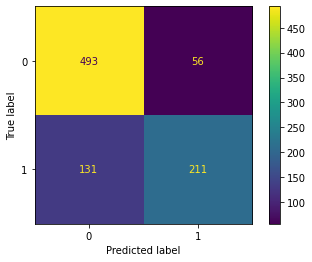

In [1566]:
m_forest_bench = train_model(data_train.drop(['PassengerId', 'Cabin', 'Name', 'Sex', 'Embarked', 'Ticket', 'Age', 'Survived'], axis=1), y, RandomForestClassifier(criterion='gini', max_depth=7, n_estimators=500))

## Step 6 - Feature Engineering

In [1102]:
from sklearn.compose import ColumnTransformer # Column Transformer
from sklearn.impute import SimpleImputer # Imputation
from sklearn.preprocessing import OneHotEncoder # One-Hot Encoding
from sklearn.preprocessing import KBinsDiscretizer # Binning
from sklearn.pipeline import Pipeline #  Pipeline for chaining Column Transformers
from sklearn.preprocessing import MinMaxScaler # Scaler between 0 and 1 - distribution stays the same
from sklearn.preprocessing import StandardScaler # Scaler with normal distribution - mean 0 and 1 standard deviation
from sklearn.preprocessing import PowerTransformer # make the data more Gaussian-like
from sklearn.preprocessing import FunctionTransformer # for custom-build functions
import feature_names

In [1103]:
# Define X and y of Model 
X_train = data_train.drop('Survived', axis=1)
y_train = data_train['Survived']

In [1104]:
X_train.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### Age

#### Replace NaN

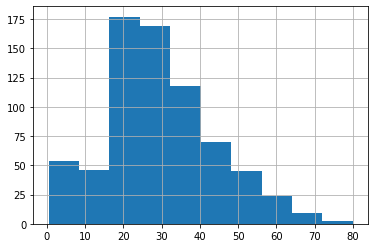

In [1105]:
X_train['Age'].hist(bins=10)

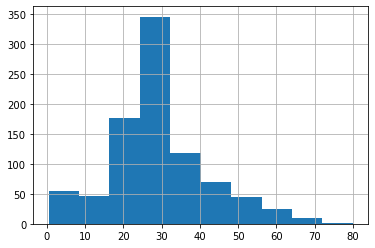

In [1106]:
X_train['Age'].fillna(value=data_train['Age'].median()).hist(bins=10)

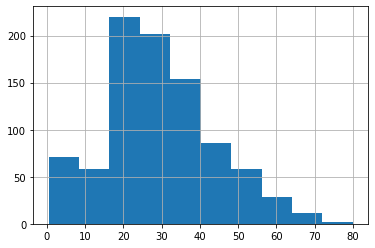

In [1107]:
X_train['Age'].fillna(method='ffill').hist(bins=10) ## Forward fill seems not alter much the distribution

In [1108]:
X_train['Age_ffill'] = data_train['Age'].fillna(method='ffill') ## Fill NaN with previous values

In [1353]:
age_feat = KBinsDiscretizer(n_bins=4, encode='onehot-dense', strategy='uniform')

In [1354]:
age_feat.fit_transform(X_train[['Age_ffill']])

array([[0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       ...,
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.]])

In [1355]:
age_feat.bin_edges_

array([array([ 0.42 , 20.315, 40.21 , 60.105, 80.   ])], dtype=object)

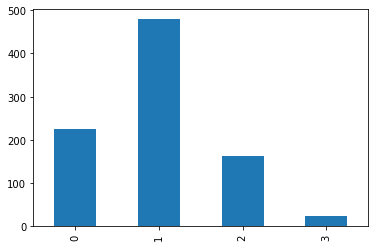

In [1356]:
pd.DataFrame(age_feat.fit_transform(X_train[['Age_ffill']])).sum().plot(kind='bar')

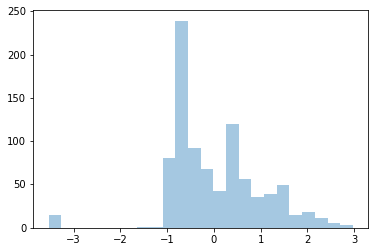

In [1113]:
fare_Scaler = PowerTransformer() #StandardScaler()  
scaled_fare = fare_Scaler.fit_transform(X_train[['Fare']])
sns.distplot(scaled_fare, kde=False)

In [1114]:
X_train['Parch_SibSp'] = X_train['Parch'] + X_train['SibSp']  

In [1472]:
pipeline_emb = Pipeline(steps=[('impute', SimpleImputer(strategy='most_frequent')), ('oneHot', OneHotEncoder(sparse=True))])
pipeline_fare = Pipeline(steps=[('impute', SimpleImputer(strategy='median')), ('scale', StandardScaler())])

In [1473]:
trans_base = ColumnTransformer([('pass', 'passthrough', ['Pclass', 'Age_ffill', 'SibSp', 'Parch', 'Fare']),
                                ('label_Sex', OneHotEncoder(sparse=True, drop='if_binary'), ['Sex']),
                           ])

In [1567]:
trans = ColumnTransformer([
    ('pass', 'passthrough', ['Pclass']),
    ('label_Sex', OneHotEncoder(sparse=True, drop='if_binary'), ['Sex']),
    ('do_nothing','passthrough', ['Parch_SibSp', 'Age_ffill']), # Keep Parch and SibSp as it is
    #('impute and oneHot', pipeline_emb, ['Embarked']), 
    #('bins', KBinsDiscretizer(n_bins=4, encode='onehot-dense', strategy='uniform'), ['Age_ffill']),
    ('impute and scale', pipeline_fare, ['Fare'])
]) 

In [1568]:
trans_columns = ['Pclass','Sex', 'Parch',  'SibSp', 'Young', 'Middle-Aged', 'Old']
#trans_columns = ['Parch',  'SibSp', 'C', 'Q', 'S']

In [1569]:
trans.fit_transform(X_train)

array([[ 3.        ,  1.        ,  1.        , 22.        , -0.50244517],
       [ 1.        ,  0.        ,  1.        , 38.        ,  0.78684529],
       [ 3.        ,  0.        ,  0.        , 26.        , -0.48885426],
       ...,
       [ 3.        ,  0.        ,  3.        , 19.        , -0.17626324],
       [ 1.        ,  1.        ,  0.        , 26.        , -0.04438104],
       [ 3.        ,  1.        ,  0.        , 32.        , -0.49237783]])

In [1570]:
cols = get_feature_names(trans)

<ipython-input-72-a4f348c8b928>:32: UserWarning: Transformer impute (type SimpleImputer) does not provide get_feature_names. Will return input column names if available
  warnings.warn("Transformer %s (type %s) does not "
<ipython-input-72-a4f348c8b928>:32: UserWarning: Transformer scale (type StandardScaler) does not provide get_feature_names. Will return input column names if available
  warnings.warn("Transformer %s (type %s) does not "


In [1571]:
X_train_feat = pd.DataFrame(trans.fit_transform(X_train))

In [1572]:
#dict_emb= {'C' : 1, 'Q' : 2, 'S' : 3}

In [1573]:
#X_train_feat['Emb_feat'] = X_train['Embarked'].fillna(method='ffill').map(dict_emb)

In [1574]:
X_train_feat.head()

,0,1,2,3,4
0,3.0,1.0,1.0,22.0,-0.502445
1,1.0,0.0,1.0,38.0,0.786845
2,3.0,0.0,0.0,26.0,-0.488854
3,1.0,0.0,1.0,35.0,0.420730
4,3.0,1.0,0.0,35.0,-0.486337


 Accuracy (TP+TN/TP+TN+FN+FP): 0.9
 Precision (TP/TP+FP): 0.92
 Recall (TP/TP+FN): 0.81
 F1-score (Precision*Recall/Precision+Recall): 0.86
None


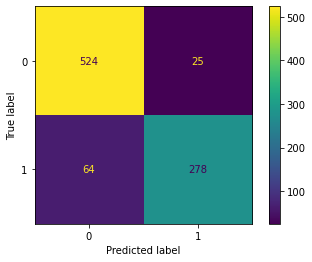

In [1592]:
m_feature = train_model(X_train_feat, y_train, RandomForestClassifier(max_depth=7, n_estimators=1000)) #RandomForestClassifier()LogisticRegression(random_state=20)

In [1593]:
m_feature.feature_importances_

array([0.12288194, 0.40208115, 0.09125325, 0.1748931 , 0.20889055])

In [1594]:
cross_val_feature_acc = cross_val_score(estimator=m_feature
                   , X=X_train_feat
                   , y=y_train
                   , cv=5
                   , scoring='accuracy')

In [1595]:
cross_val_feature_pre = cross_val_score(estimator=m_feature
                   , X=X_train_feat
                   , y=y_train
                   , cv=5
                   , scoring='recall')

In [1596]:
print(cross_val_feature_acc.mean())
print(cross_val_feature_pre.mean())

0.8271922666499278
0.6958226768968456


## Test on test data - on Kaggle test data

In [1332]:
#X_test['Age_ffill'] = X_test['Age'].fillna(method='ffill')
#X_test['Parch_SibSp'] = X_test['Parch'] + X_test['SibSp']  
#X_test_feat = pd.DataFrame(trans.transform(X_test))
#y_test_pred = m_feature.predict(X_test_feat)

In [1333]:
#accuracy_score(y_test, y_test_pred)

In [1334]:
#precision_score(y_test, y_test_pred)

In [1335]:
#recall_score(y_test, y_test_pred)

In [1336]:
X_test = pd.read_csv('data/test.csv')

In [1337]:
X_test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [1338]:
X_test['Age_ffill'] = X_test['Age'].fillna(method='ffill')

In [1339]:
X_test['Parch_SibSp'] = X_test['Parch'] + X_test['SibSp'] 

In [1341]:
X_test_feat = pd.DataFrame(trans.transform(X_test))

In [1342]:
outcome = pd.DataFrame({'PassengerId' : X_test['PassengerId'], 'Survived' : m_feature.predict(X_test_feat)})
outcome.set_index('PassengerId', inplace=True)

In [1343]:
outcome.to_csv('data/outcome1.csv')